# Previsão de Passageiros - Serie Temporal

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler
# Set the default
# mpl.rcParams['figure.figsize'] = (10, 6)
# mpl.rcParams['font.size'] = 22

In [2]:
# Carregando os dados
passageiros = pd.read_csv('./datasets/passageiros.csv')

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

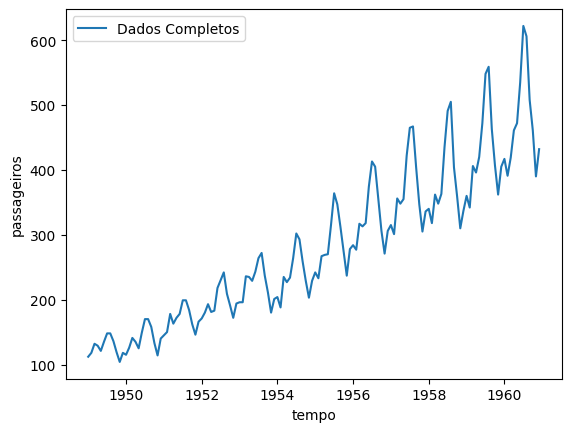

In [4]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='Dados Completos')

In [5]:
sc = StandardScaler()

In [6]:
sc.fit(passageiros)

StandardScaler()

In [7]:
dado_escalado = sc.transform(passageiros)

In [8]:
x = dado_escalado[:, 0]
y = dado_escalado[:, 1]

Text(0.5, 0, 'Tempo')

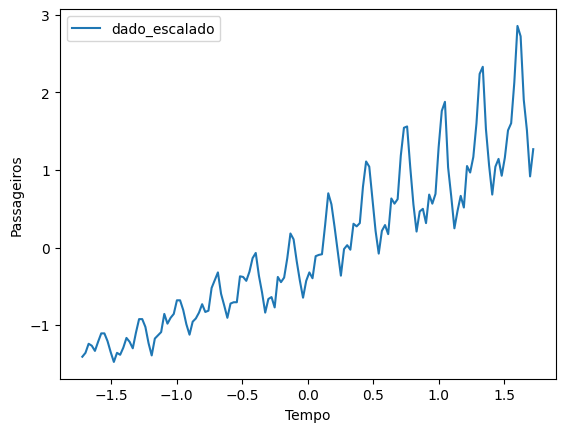

In [9]:
import matplotlib.pyplot as plt

sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [10]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [11]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [12]:
x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Tempo')

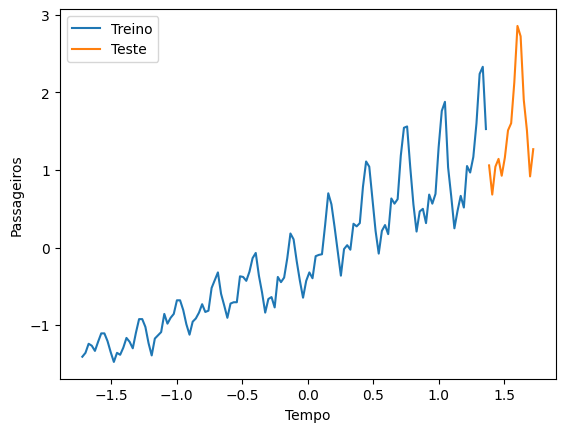

In [13]:
sns.lineplot(x=x_treino, y=y_treino, label='Treino')
sns.lineplot(x=x_teste, y=y_teste, label='Teste')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

## Regressão Linear

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

regressor = Sequential()

In [15]:
regressor.add(Dense(units=1, input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear'))

In [16]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
regressor.fit(x_treino, y_treino)


5/5 [==============================] - 1s 4ms/step - loss: 0.1285


In [19]:
y_pred = regressor.predict(x_treino)

5/5 [==============================] - 0s 2ms/step


<Axes: >

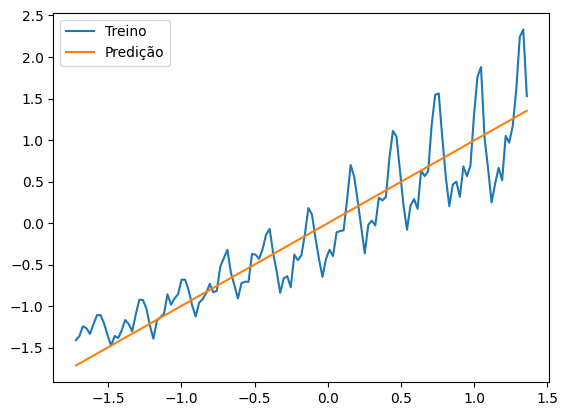

In [20]:
sns.lineplot(x=x_treino, y=y_treino, label='Treino')
sns.lineplot(x=x_treino, y=y_pred[:, 0], label='Predição')

In [21]:
d = {'tempo': x_treino, 'passageiros': y_pred[:, 0]}
resultados = pd.DataFrame(data=d)

In [22]:
resultado_transf = sc.inverse_transform(resultados)

In [23]:
resultados_transf = pd.DataFrame(resultado_transf, columns=['tempo', 'passageiros'])

<Axes: xlabel='tempo', ylabel='passageiros'>

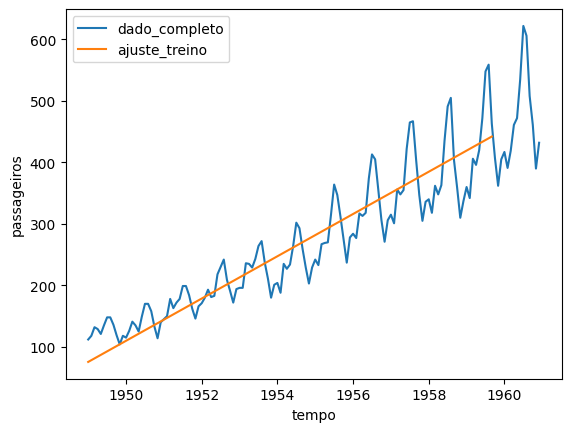

In [24]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_transf, label='ajuste_treino')

In [25]:
y_predict_teste = regressor.predict(x_teste)

1/1 [==============================] - 0s 69ms/step


In [26]:
d = {'tempo': x_teste, 'passageiros': y_predict_teste[:, 0]}
resultados_teste = pd.DataFrame(data=d)

In [27]:
resultados_transf_teste = pd.DataFrame(sc.inverse_transform(resultados_teste), columns=['tempo', 'passageiros'])

<Axes: xlabel='tempo', ylabel='passageiros'>

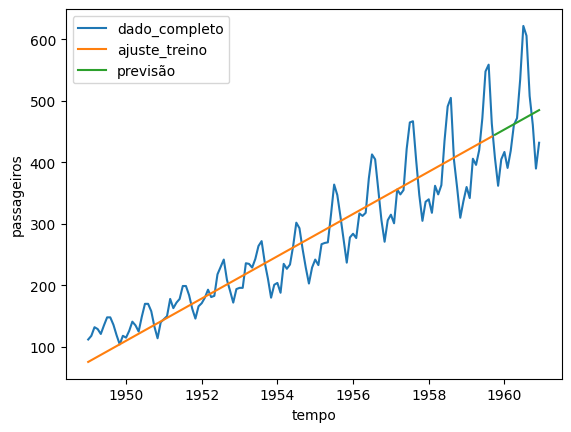

In [28]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultados_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultados_transf_teste, label='previsão')

## Multi Layer Perceptron

In [29]:
regressor2 = Sequential()

In [30]:
regressor2.add(Dense(units=8, input_dim=1, kernel_initializer='random_uniform', use_bias=False, activation='sigmoid'))
regressor2.add(Dense(units=8, kernel_initializer='random_uniform', use_bias=False, activation='sigmoid'))
regressor2.add(Dense(units=1, kernel_initializer='random_uniform', use_bias=False, activation='linear'))

regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
regressor2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: 0.8099
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8066
Epoch 3/500
5/5 [==============================] - 0s 4ms/step - loss: 0.8040
Epoch 4/500
5/5 [==============================] - 0s 12ms/step - loss: 0.8025
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8026
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8017
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8005
Epoch 8/500
5/5 [==============================] - 0s 4ms/step - loss: 0.8000
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7988
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7974
Epoch 11/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7964
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7955
Epoch 13/500
5/5 [==============================] - 0s 2ms/s

In [32]:
y_pred = regressor2.predict(x_treino)

5/5 [==============================] - 0s 3ms/step


In [33]:
y_pred_teste = regressor2.predict(x_teste)

1/1 [==============================] - 0s 58ms/step


<Axes: >

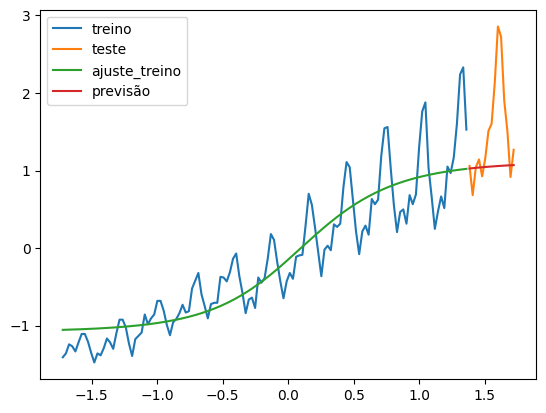

In [34]:
sns.lineplot(x=x_treino, y=y_treino, label='treino')
sns.lineplot(x=x_teste, y=y_teste, label='teste')
sns.lineplot(x=x_treino, y=y_pred[:, 0], label='ajuste_treino')
sns.lineplot(x=x_teste, y=y_pred_teste[:, 0], label='previsão')

## Janela de tempo

In [35]:
vetor = pd.DataFrame(y_treino)[0]

In [36]:
def separa_dados(vetor, n_passos):
    X_novo = []
    y_novo = []
    for i in range(n_passos, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    return np.array(X_novo), np.array(y_novo)

In [37]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [38]:
x_treino_novo[0:5], y_treino_novo[0:5]

(array([[-1.40777884],
        [-1.35759023],
        [-1.24048348],
        [-1.26557778],
        [-1.33249593]]),
 array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918]))

In [39]:
vetor2 = pd.DataFrame(y_teste)[0]

In [40]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

In [41]:
x_teste_novo[0:5], y_teste_novo[0:5]

(array([[1.05982773],
        [0.68341317],
        [1.04309819],
        [1.14347541],
        [0.92599144]]),
 array([0.68341317, 1.04309819, 1.14347541, 0.92599144, 1.16020494]))

In [42]:
regressor3 = Sequential()

In [43]:
regressor3.add(Dense(units=8, input_dim=1, kernel_initializer='ones', use_bias=False, activation='linear'))
regressor3.add(Dense(units=64, kernel_initializer='random_uniform', use_bias=False, activation='sigmoid'))
regressor3.add(Dense(units=1, kernel_initializer='random_uniform', use_bias=False, activation='linear'))

regressor3.compile(loss='mean_squared_error', optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 3ms/step - loss: 0.8018
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7531
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7297
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7166
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6958
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6731
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6496
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6245
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5968
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5685
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5350
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5002
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [45]:
y_predict_novo = regressor3.predict(x_treino_novo)

4/4 [==============================] - 0s 3ms/step


<Axes: xlabel='tempo', ylabel='0'>

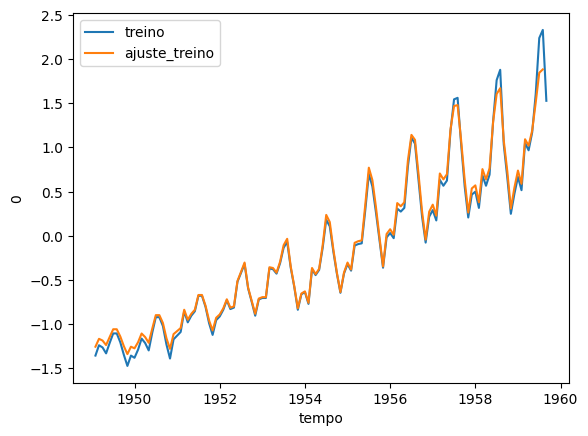

In [46]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')

In [47]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)

1/1 [==============================] - 0s 122ms/step


In [48]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

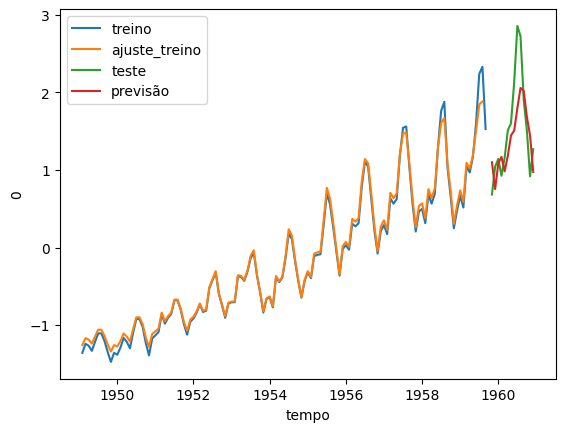

In [49]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')

In [50]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [51]:
x_treino_novo[0:5], y_treino_novo[0:5]

(array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
        [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
        [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
        [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
        [-1.33249593, -1.21538918, -1.10664719, -1.10664719]]),
 array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441]))

In [52]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

In [53]:
regressor4 = Sequential()

In [54]:
regressor4.add(Dense(units=8, input_dim=4, kernel_initializer='ones', use_bias=False, activation='linear'))
regressor4.add(Dense(units=64, kernel_initializer='random_uniform', use_bias=False, activation='sigmoid'))
regressor4.add(Dense(units=1, kernel_initializer='random_uniform', use_bias=False, activation='linear'))

regressor4.compile(loss='mean_squared_error', optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 608 (2.38 KB)


Trainable params: 608 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
regressor4.fit(x_treino_novo, y_treino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 3ms/step - loss: 0.7473
Epoch 2/300
4/4 [==============================] - 0s 17ms/step - loss: 0.6781
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6147
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 0.5482
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4861
Epoch 6/300
4/4 [==============================] - 0s 5ms/step - loss: 0.4257
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3644
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3083
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2602
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2199
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1899
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1682
Epoch 13/300
4/4 [==============================] - 0s 4ms/

In [56]:
y_predict_novo = regressor4.predict(x_treino_novo)

4/4 [==============================] - 0s 3ms/step


In [57]:
y_predict_teste_novo = regressor4.predict(x_teste_novo)

1/1 [==============================] - 0s 41ms/step


In [58]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [59]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

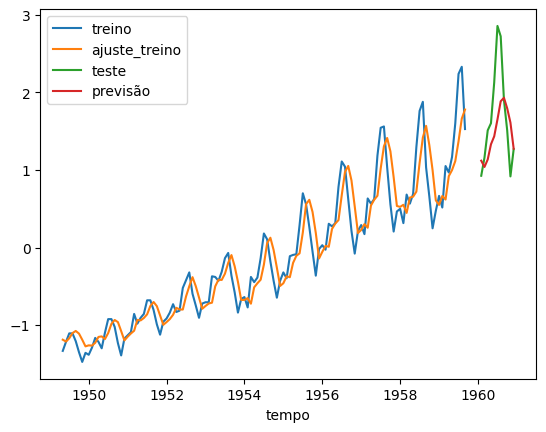

In [60]:
sns.lineplot(x='tempo', y=y_treino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=y_teste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')